In [12]:
graph1 = {'a':['b','c'], 'b':['a','c'], 'c':['a','b']}
Graph(graph1).adjacency_matrix()
print("New change")

[0 1 1]
[1 0 1]
[1 1 0]

In [2]:
import numpy as np
import networkx as nx
import numpy.linalg as la

In [66]:
def vol(G):
    V = 0
    for v in G.vertices():
        V+=G.degree(v)
    return V

In [67]:
def trans_prob_matrix(G):
    A = G.adjacency_matrix()
    D= diagonal_matrix([G.degree(v) for v in G.vertices()])
    Dinv = D^(-1)
    P = Dinv * A
    return P

In [137]:
def deg_matrix(G):
    return diagonal_matrix([G.degree(v) for v in G.vertices()], sparse = False)

In [69]:
def edge_ordering_dictionary(G):
    D=dict()
    i=0
    for u in G.vertices():
        for v in G.neighbors(u):
            D.setdefault((u,v),i)
            i=i+1
    return D

In [70]:
def trans_prob_matrix_nb(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(float(1)/(G.degree(v)-1))
            else: L.append(0)
    P = matrix(vol(G), L)
    return P

In [71]:
def edge_adjacency_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L)
    return B

In [72]:
def edge_adjacency_nb_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L) 
    return B

In [232]:
def compute_nb_evals(G):
    
    """
    The j is the tuple with the evalue evec and multiplicity, not an integer iterator
    This is nice since we won't need the get_ihara_evec function anymore
    Fix this when I come back to it
    
    """
    
    
    
    u1 = []
    K = ihara_matrix(G)
    for A_evec in G.eigenvectors():
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            mu_str = "Actual mu: " + str(mu)
            G1 = A_evec
            lam = G1[0]
            x_vectors = G1[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                B_evec = K_evec[1]
                for K_evec_same_eval in B_evec:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            u1.append("TRUE")
                            u1.append(mu_str)
                            u1.append(mu1_calculated)
                            u1.append(mu2_calculated)
                    #else: 
                        #u1.append(mu_str)
                        #u1.append("NA")
    return u1

In [253]:
def find_eigenvalues(G):
    
    """
                        if mu1_calculated in set_of_evals:
                            print("remove: " + str(mu1_calculated))
                            set_of_evals.remove(mu1_calculated)
                        if mu2_calculated in set_of_evals:
                            print("remove: " + str(mu2_calculated))
                            set_of_evals.remove(mu2_calculated)
    """
    
    K = ihara_matrix(G)
    set_of_evals = list(K.eigenvalues())
    for A_evec in G.eigenvectors():
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            lam = A_evec[0]
            x_vectors = A_evec[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                K_evectors = K_evec[1]
                for K_evec_same_eval in K_evectors:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            if mu in set_of_evals:
                                set_of_evals.remove(mu)
                                #print(str(mu1_calculated) + " or " + str(mu2_calculated) + " removed.")
    if len(set_of_evals) == 0:
        print("All eigenvalues found")
    else:
        print("These eigenvalues were not found: " + str(set_of_evals))

In [292]:
def ihara_matrix(G):
    A = G.adjacency_matrix(); D=deg_matrix(G); I = identity_matrix(G.order()); Z=matrix.zero(G.order())
    return block_matrix(QQbar, [[A,D-I],[-I,Z]], subdivide = false)

In [156]:
def get_ihara_evec(G,j):
    K = ihara_matrix(G)
    K_i = K.eigenvectors_right()[j]
    K_i_evec = K_i[1]
    return K_i_evec

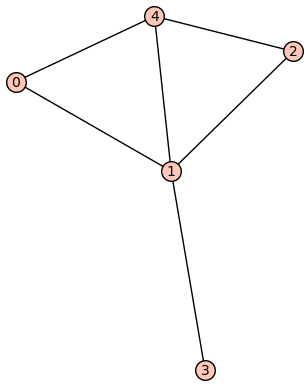

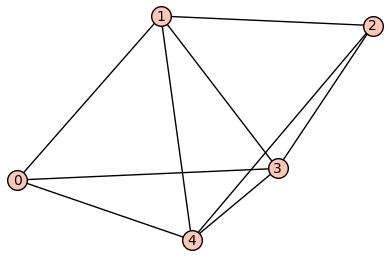

True
All eigenvalues found


'\nfor j in range(5):\n    for i in range (3):\n        G = graphs.RandomGNP(4+i,0.5+0.5^(i+1))\n        show(G)\n        K = ihara_matrix(G)\n        print(K.is_diagonalizable())\n        find_eigenvalues(G)\n'

In [323]:
#G = deg_two_graph(5,0.7)
#G.add_vertex()
#G.add_edge(6,0)
#K = ihara_matrix(G)
#show(G)
#print(K.is_diagonalizable())
#find_eigenvalues(G)


"""
for j in range(5):
    for i in range (3):
        G = graphs.RandomGNP(4+i,0.5+0.5^(i+1))
        show(G)
        K = ihara_matrix(G)
        print(K.is_diagonalizable())
        find_eigenvalues(G)
"""

#print("These are the computed eigenvalues: ")
#print(compute_nb_evals(G))
#print("These are the actual eigenvalues: ")
#print(ihara_matrix(G).eigenvalues())

Ihara matrix is diagonalizable: True
These eigenvalues were not found: [1, -1]


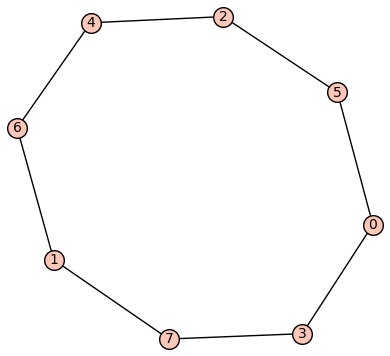

Ihara matrix is diagonalizable: True


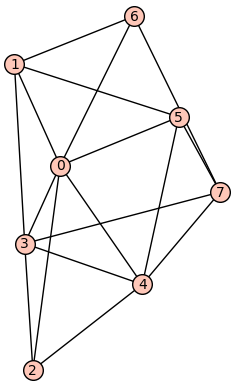

Ihara matrix is diagonalizable: True


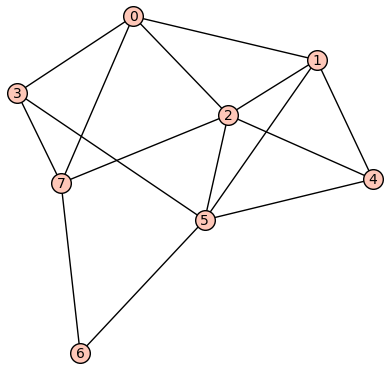

Ihara matrix is diagonalizable: True


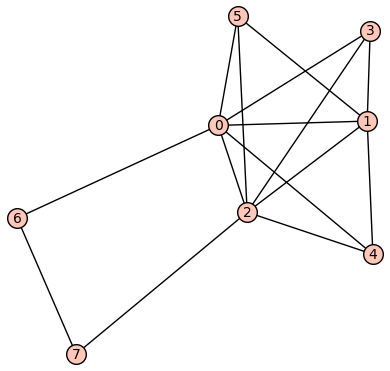

Ihara matrix is diagonalizable: True


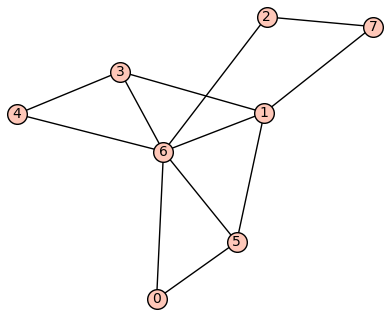

In [353]:
G = graphs.RandomRegular(2,8)
#print(G.adjacency_matrix().eigenvalues())
random = ihara_matrix(G)
#print(random)
#print(random.eigenvalues())
print("Ihara matrix is diagonalizable: " + str(K.is_diagonalizable()))
find_eigenvalues(G)
show(G)
for i in range(4):
    G = deg_two_graph(8,0.5)
    K = ihara_matrix(G)
    print("Ihara matrix is diagonalizable: " + str(K.is_diagonalizable()))
    show(G)

In [352]:
def deg_two_graph(n,p):
    graph = graphs.RandomGNP(n,p)
    #show(graph)
    # Check and update the degrees
    degrees = graph.degree()
    vertices_to_update = [v for v in graph.vertices() if degrees[v] < 2]
    while vertices_to_update:
        v = vertices_to_update.pop()
        neighbors = graph.neighbors(v)
        for u in vertices_to_update:
            if u != v and u not in neighbors:
                graph.add_edge(v, u)
                degrees[v] += 1
                degrees[u] += 1
                if degrees[v] < 2:
                    vertices_to_update.append(v)
                if degrees[u] >= 2 and u in vertices_to_update:
                    vertices_to_update.remove(u)

    return graph

In [27]:
G = graphs.ButterflyGraph()
K = ihara_matrix(G)
print(K)
A = G.adjacency_matrix()
print(A.eigenvectors_right())

[ 0  0  0  1  1  1  0  0  0  0]
[ 0  0  1  0  1  0  1  0  0  0]
[ 0  1  0  0  1  0  0  1  0  0]
[ 1  0  0  0  1  0  0  0  1  0]
[ 1  1  1  1  0  0  0  0  0  3]
[-1  0  0  0  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  0]
[ 0  0  0  0 -1  0  0  0  0  0]
[(1, [
(1, -1, -1, 1, 0)
], 1), (-1, [
(1, 0, 0, -1, 0),
(0, 1, -1, 0, 0)
], 2), (-1.561552812808831?, [(1, 1, 1, 1, -2.561552812808830?)], 1), (2.561552812808830?, [(1, 1, 1, 1, 1.561552812808831?)], 1)]
